In [57]:
import matplotlib.pyplot as plt
from   matplotlib.colors import LogNorm

from scipy.special import logsumexp
from scipy import stats

import numpy as np

from bocpd import bocpd
from bocpd2 import bocpd as bocpd2
from hazard import ConstantHazard
from models import GaussianUnknownMean, GaussianUnknownMeanVariance
from models import SMGaussianUnknownMean, DSMGaussianUnknownMean, DSMGaussianUnknownMeanVariance, DSMGaussianUnknownMeanVariance2 
from generate_data import generate_data
from beta_estimator import BetaEstimatorFisher, BetaEstimatorKL


from plot import plot_posterior

# synthetic dataset

In [58]:
np.random.seed(4574)

T      = 2000 # Number of observations.
hazard = ConstantHazard(400)
mean0  = 0      # The prior mean on the mean parameter.
var0   = 5 
# The prior variance for mean parameter.
varx   = 1      # The known variance of the data.

data, cps  = generate_data(varx, mean0, var0, T, hazard)
data = np.array(data)
#contamination = np.random.choice(np.arange(T),size=20)
#data[contamination] = data[contamination] + np.random.normal(loc=0,scale=60)


## BOCPD

In [59]:
model  = GaussianUnknownMean(mean0, var0, varx)

In [60]:
%%time
R_BOCP  = bocpd(data, hazard, model)

CPU times: user 2.68 s, sys: 6.62 ms, total: 2.68 s
Wall time: 2.69 s


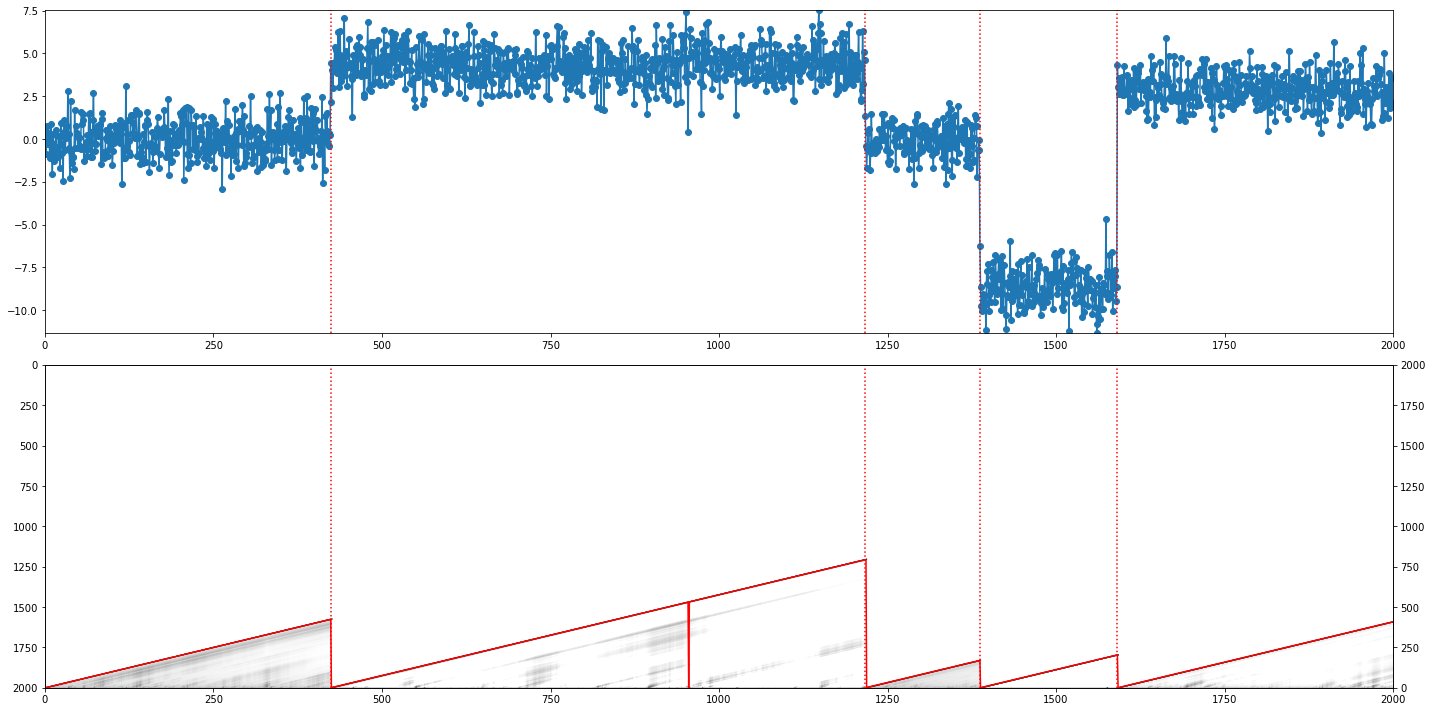

In [61]:
plot_posterior(T, data, R_BOCP, cps)

In [79]:
cps

[424, 1217, 1387, 1591]

In [83]:
R_BOCP[423][:10]

array([0.0025    , 0.00110775, 0.0007583 , 0.00064777, 0.0005508 ,
       0.00062157, 0.00053759, 0.00072568, 0.00041819, 0.00040018])

## SM-BOCPD

In [6]:
def grad_t(x):
    return np.eye(1)/varx

def grad_b(x):
    return -x/varx

def lap_t(x):
    return np.zeros(1)

data = np.array(data).reshape([T,1])
beta = 0.0001

model = SMGaussianUnknownMean(data, grad_t, lap_t, grad_b, beta, mean0, var0, varx)

In [7]:
%%time
R = bocpd(data, hazard, model)

CPU times: user 2.88 s, sys: 9.89 ms, total: 2.89 s
Wall time: 2.91 s


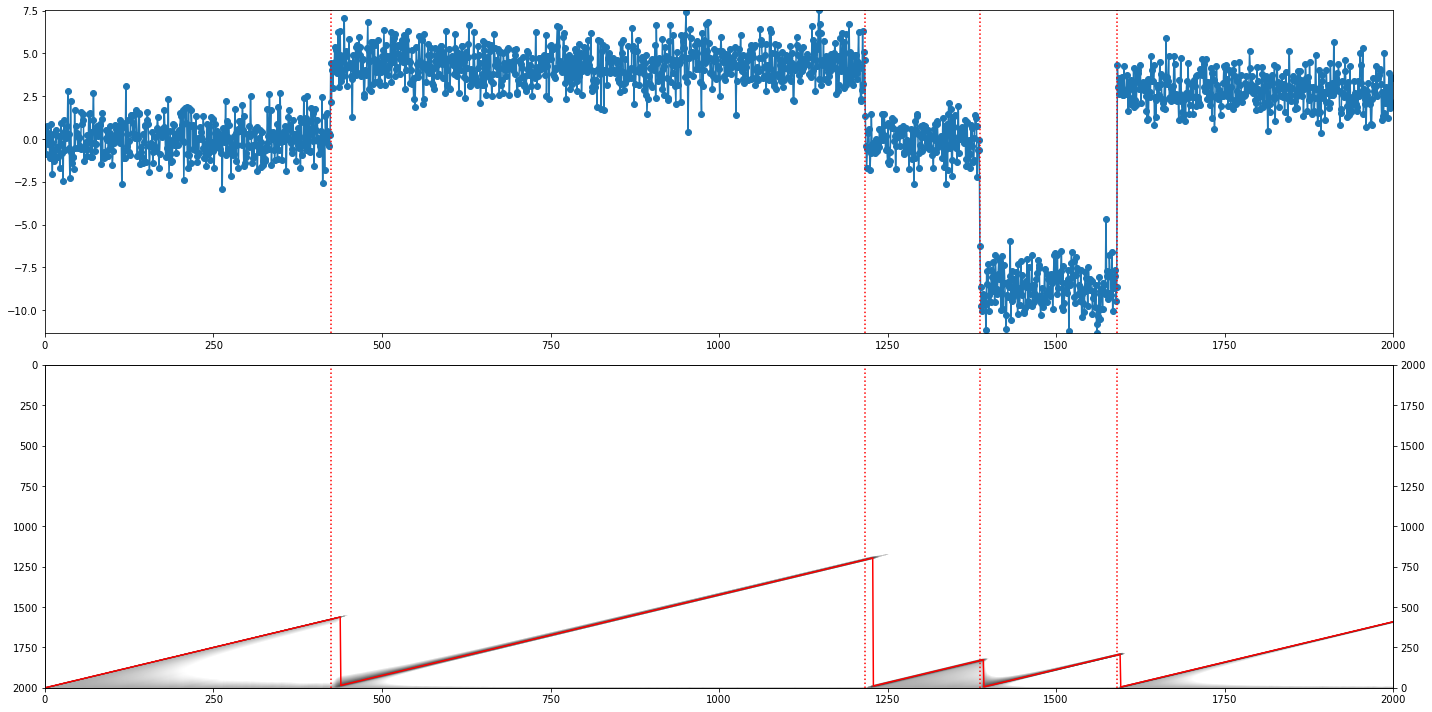

In [8]:
plot_posterior(T, data, R, cps)

## DSM-BOCPD

In [9]:
def m(x):
    return np.array([(1+x**2)**(-1/2)])

def grad_m(x):
    return np.array([[-x/((1+x**2)**(3/2))]])

def grad_t(x):
    return np.eye(1)/varx

def grad_b(x):
    return -np.array([x])/varx

def hess_t(x):
    return np.zeros([1,1,1])

data = np.array(data).reshape([T,1])
beta = 0.01
model = DSMGaussianUnknownMean(data,m ,grad_m, grad_t, hess_t, grad_b, beta, mean0, var0, varx)

In [10]:
%%time
R  = bocpd(data, hazard, model)

CPU times: user 2.86 s, sys: 10 ms, total: 2.87 s
Wall time: 2.88 s


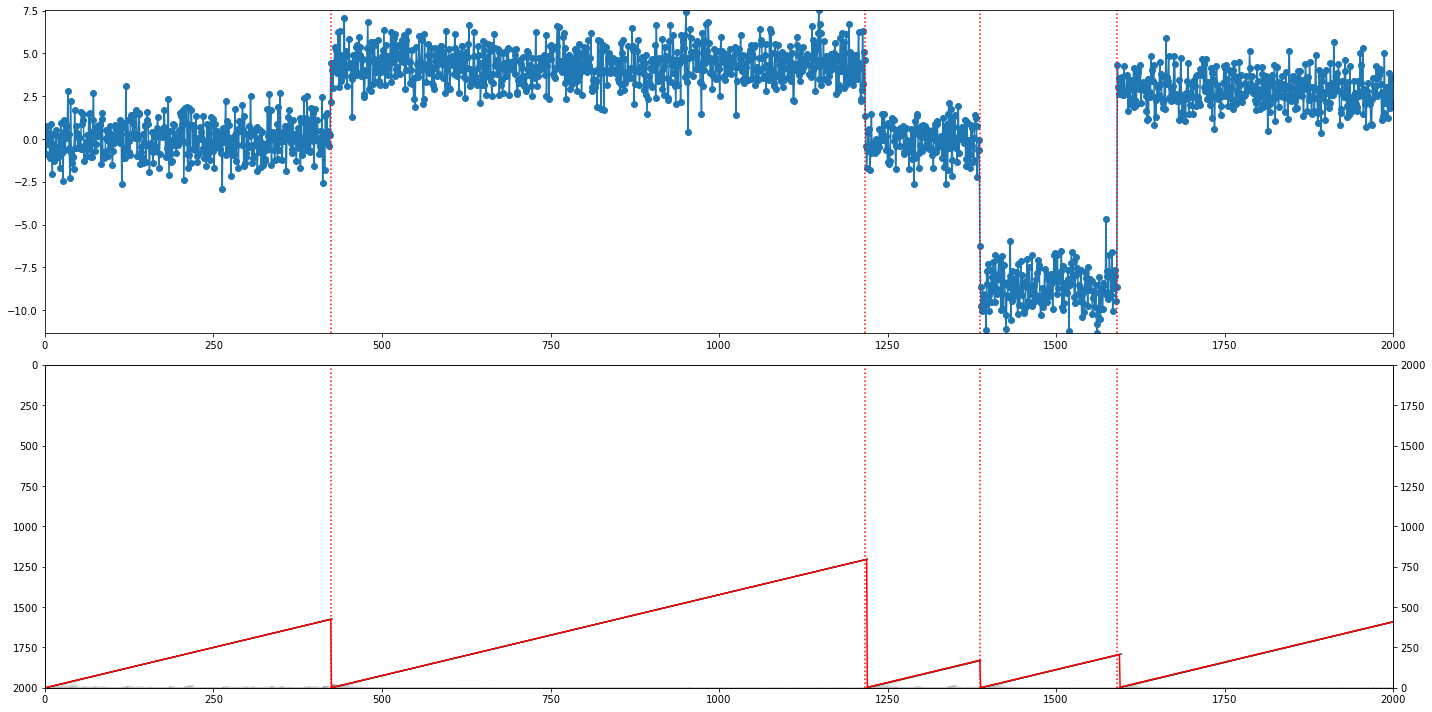

In [11]:
plot_posterior(T, data, R, cps)

### Unknown Mean and Variance

In [12]:
model  = GaussianUnknownMeanVariance(mean0, 1/var0, 1, 1)

In [13]:
%%time
R  = bocpd(data, hazard, model)

CPU times: user 1.2 s, sys: 104 µs, total: 1.2 s
Wall time: 1.21 s


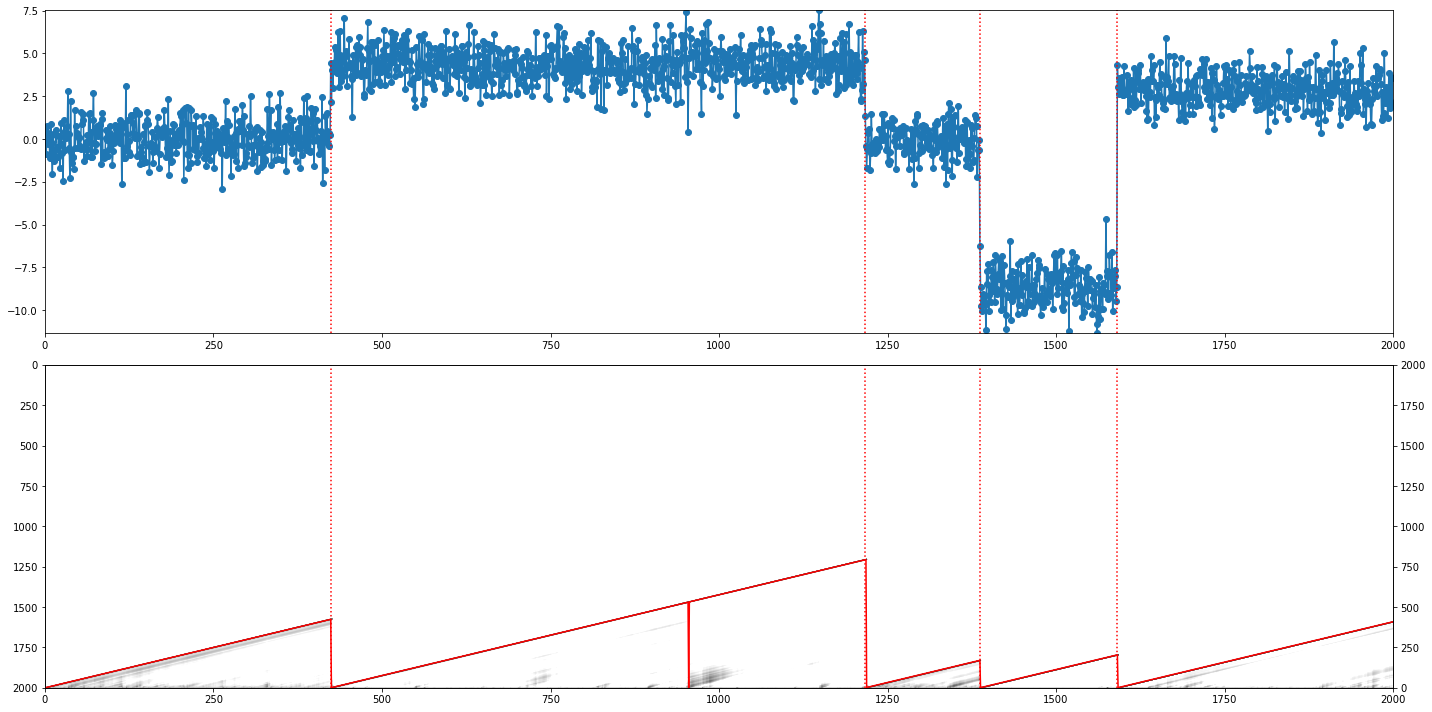

In [14]:
plot_posterior(T, data, R, cps)

In [54]:
def m(x):
    return np.array([(1+x**2)**(-1/2)])

def grad_m(x):
    return np.array([[-x/((1+x**2)**(3/2))]])

def grad_t(x):
    return np.array([[1,-x]],dtype='float')

def grad_b(x):
    return np.array([[0]])

def hess_t(x):
    return np.array([[[0,-1]]])

data = np.array(data).reshape([T,1])
beta = 0.5

mu0 = np.array([[0], [1]])
Sigma0 = np.eye(2)
Sigma0[0,0] = 5
Sigma0[1,1] = 0.2

model = DSMGaussianUnknownMeanVariance(data,m ,grad_m, grad_t, hess_t, grad_b, beta, mu0, Sigma0, b = 10)

In [55]:
%%time
R  = bocpd2(data, hazard, model, K=50, verbose = True)

/tmp/ipykernel_27480/25058587.py:8: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  return np.array([[1,-x]],dtype='float')


Processing observation #100
Processing observation #200
Processing observation #300
Processing observation #400
Processing observation #500
Processing observation #600
Processing observation #700
Processing observation #800
Processing observation #900
Processing observation #1000
Processing observation #1100
Processing observation #1200
Processing observation #1300
Processing observation #1400
Processing observation #1500
Processing observation #1600
Processing observation #1700
Processing observation #1800
Processing observation #1900
Processing observation #2000
CPU times: user 2min 23s, sys: 108 ms, total: 2min 23s
Wall time: 2min 24s


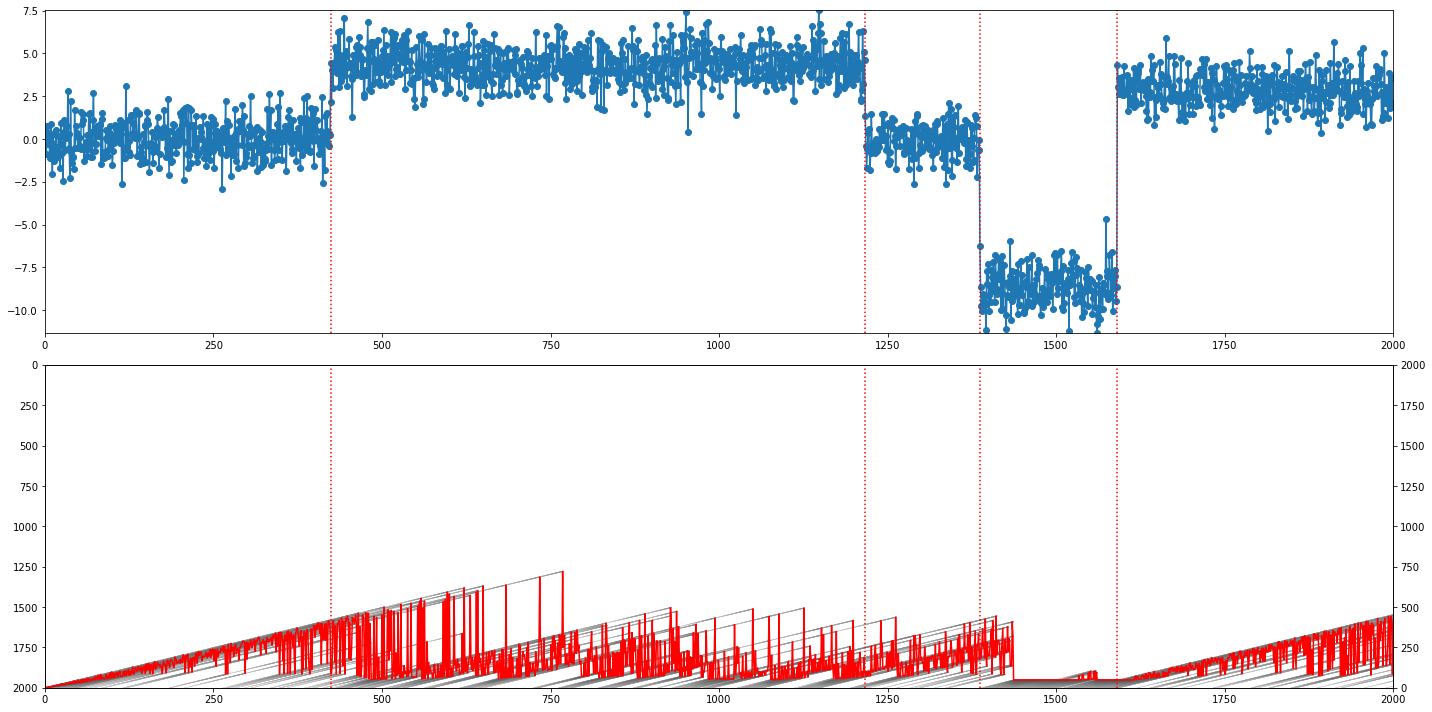

In [56]:
plot_posterior(T, data, R, cps)

In [18]:
def m(x):
    return np.array([(1+x**2)**(-1/2)])

def grad_m(x):
    return np.array([[-x/((1+x**2)**(3/2))]])

def grad_t(x):
    return np.array([[1,-x]],dtype='float')

def grad_b(x):
    return np.array([[0]])

def hess_t(x):
    return np.array([[[0,-1]]])

data = np.array(data).reshape([T,1])
beta = 0.1

mu0 = np.array([[0], [1]])
Sigma0 = np.eye(2)
Sigma0[0,0] = 1
Sigma0[1,1] = 1

model = DSMGaussianUnknownMeanVariance2(data,m ,grad_m, grad_t, hess_t, grad_b, beta, mu0, Sigma0)

In [19]:
%%time
R  = bocpd2(data, hazard, model, K=50, verbose=True)

/tmp/ipykernel_27480/4202780340.py:8: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  return np.array([[1,-x]],dtype='float')


Processing observation #100
Processing observation #200
Processing observation #300
Processing observation #400
Processing observation #500
Processing observation #600
Processing observation #700
Processing observation #800
Processing observation #900
Processing observation #1000
Processing observation #1100
Processing observation #1200
Processing observation #1300
Processing observation #1400
Processing observation #1500
Processing observation #1600
Processing observation #1700
Processing observation #1800
Processing observation #1900
Processing observation #2000
CPU times: user 3min 7s, sys: 125 ms, total: 3min 7s
Wall time: 3min 8s


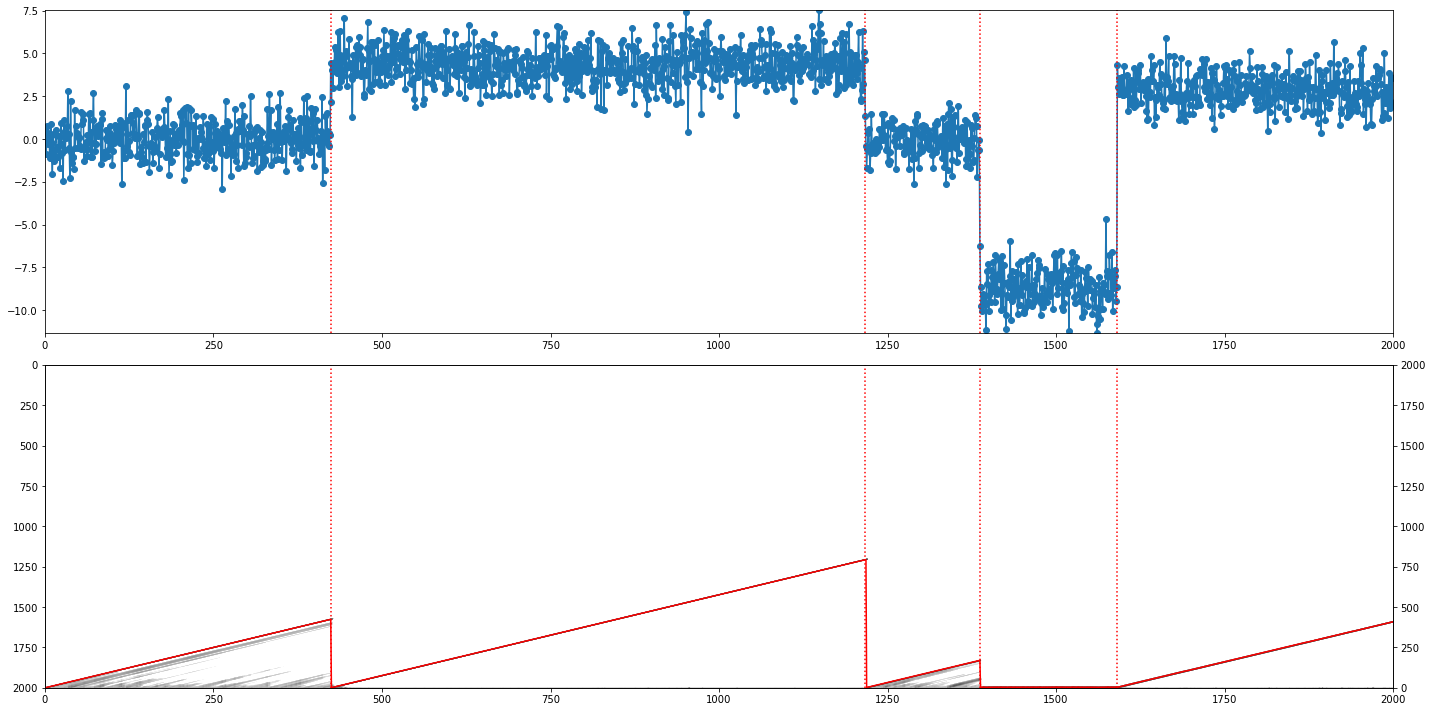

In [20]:
plot_posterior(T, data, R, cps)

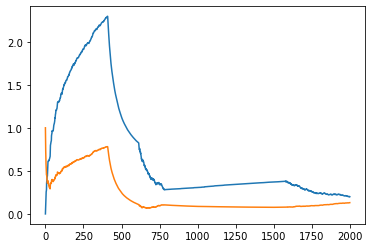

In [21]:
plt.plot(model.mu[:,0])
plt.plot(model.mu[:,1])

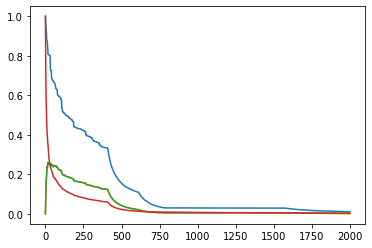

In [22]:
plt.plot(model.Sigma[:,0,0])
plt.plot(model.Sigma[:,0,1])
plt.plot(model.Sigma[:,1,0])
plt.plot(model.Sigma[:,1,1])

# Well-log

In [23]:
PATH = 'data/well log/well.txt'

In [24]:
data = np.loadtxt(PATH)[1100:3400]
T=len(data)
data = data.reshape([T,1])

In [25]:
mean0 = 1.3e5
var0 = 1e7
#varx = 1e6
varx = 1e7

mean0 = 1.15e5

hazard = ConstantHazard(250)

## BOCPD

In [26]:
model  = GaussianUnknownMean(mean0, var0, varx)

In [27]:
%%time
R  = bocpd(data, hazard, model)

CPU times: user 2.84 s, sys: 26.4 ms, total: 2.86 s
Wall time: 2.88 s


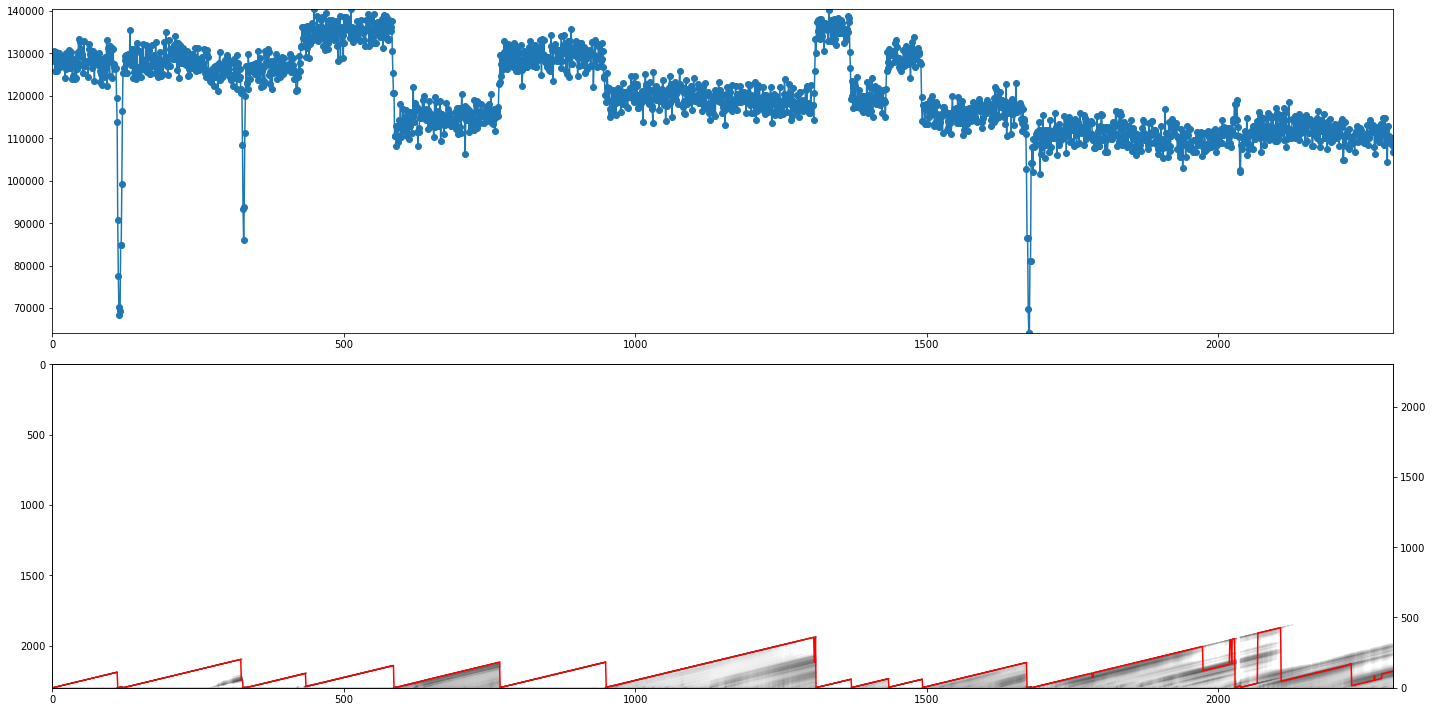

In [28]:
plot_posterior(T, data, R)

## SM-BOCPD

In [29]:
def grad_t(x):
    return np.eye(1)/varx

def grad_b(x):
    return -x/varx

def lap_t(x):
    return np.zeros(1)

#beta = 6e-10
#beta = 5e2
beta = 1e5

model = SMGaussianUnknownMean(data, grad_t, lap_t, grad_b, beta, mean0, var0, varx)

In [30]:
%%time
R  = bocpd(data, hazard, model)

CPU times: user 2.98 s, sys: 3.33 ms, total: 2.98 s
Wall time: 2.99 s


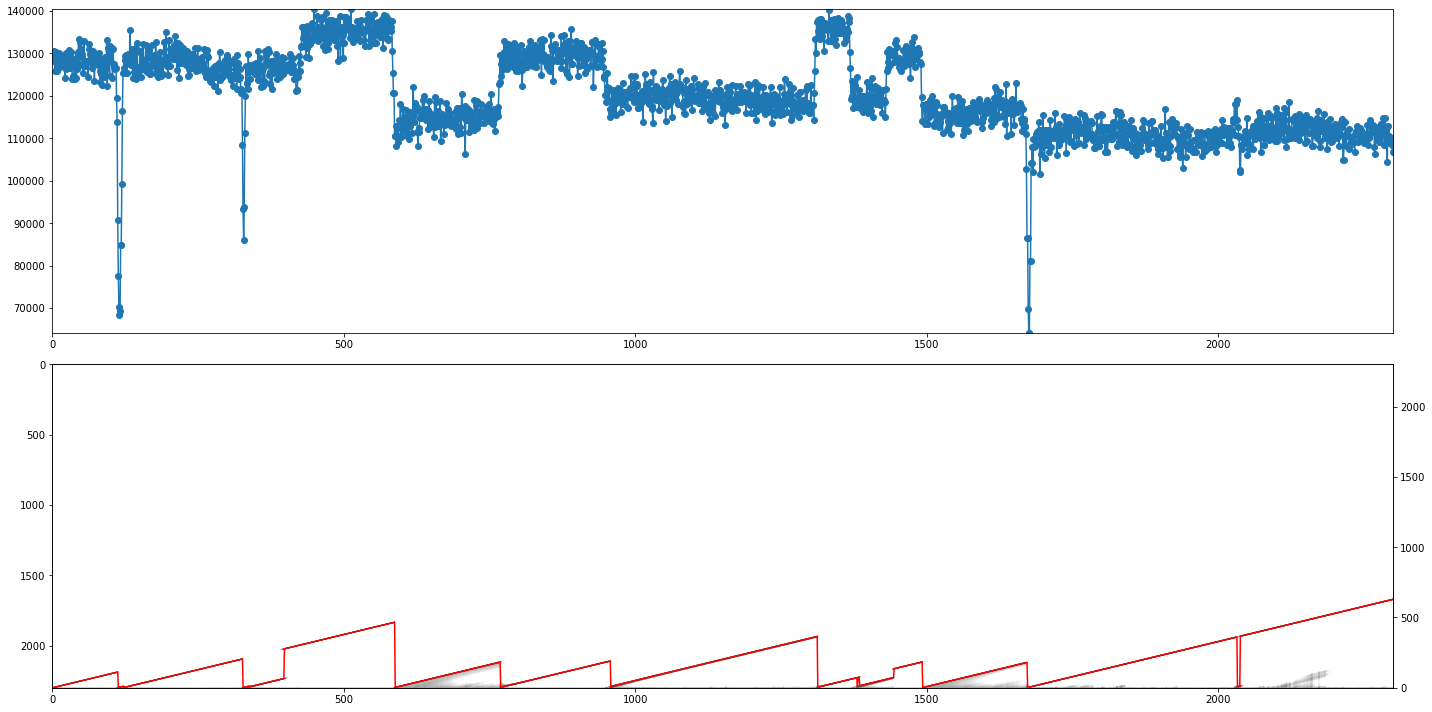

In [31]:
plot_posterior(T, data, R)

## DSM-BOCPD

In [32]:
def m(x):
    return np.array([(1+(x)**2)**(-1/2)])*varx

def grad_m(x):
    return np.array([[-x/((1+x**2)**(3/2))]])*varx

def grad_t(x):
    return np.eye(1)/varx

def grad_b(x):
    return -np.array([x])/varx

def hess_t(x):
    return np.zeros([1,1,1])

data = np.array(data).reshape([T,1])
#beta = 1e-4
#beta = 12
beta = 10

model = DSMGaussianUnknownMean(data,m ,grad_m, grad_t, hess_t, grad_b, beta, mean0, var0, varx)

In [33]:
%%time
R  = bocpd(data, hazard, model)

CPU times: user 4.46 s, sys: 56.5 ms, total: 4.52 s
Wall time: 4.55 s


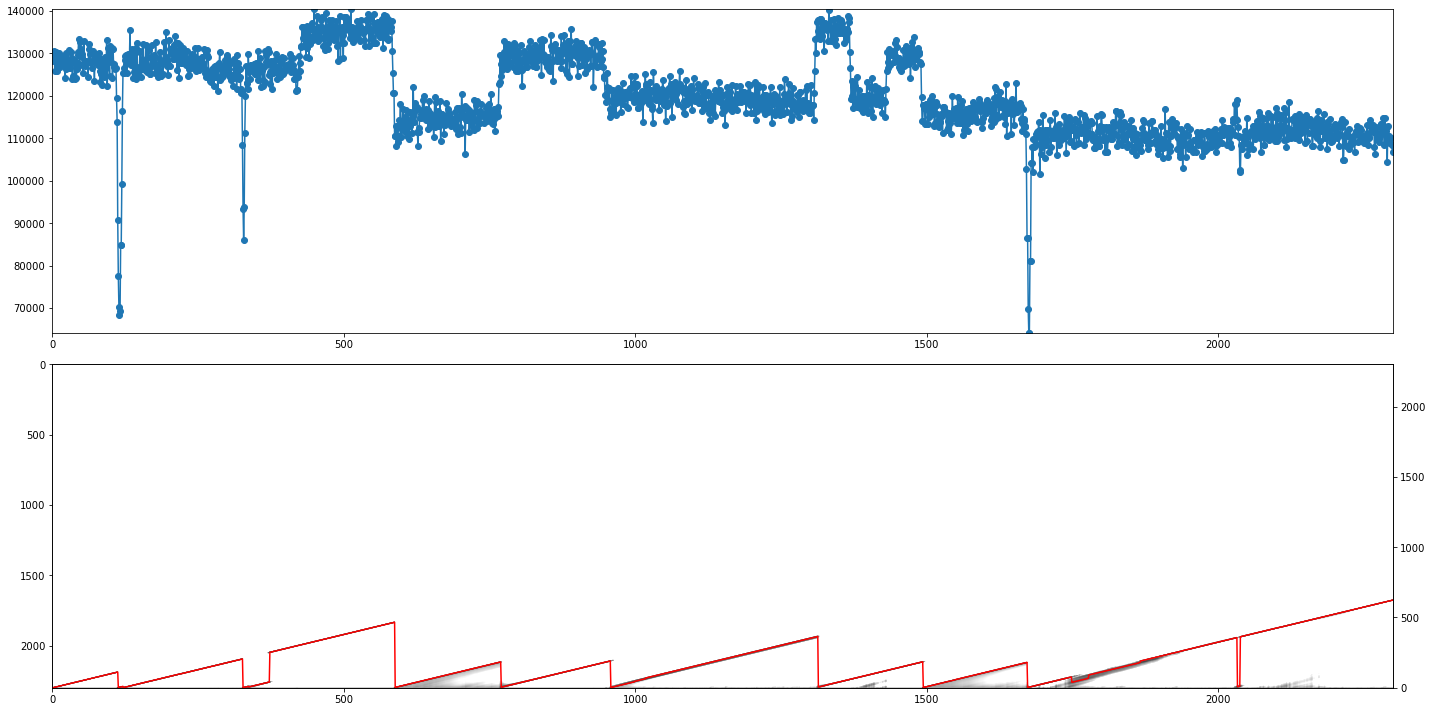

In [34]:
plot_posterior(T, data, R)

## Beta Estimator KL

In [35]:
betaEstimator = BetaEstimatorKL(data[0:100], m, grad_m, grad_t, hess_t, grad_b, mean0, var0,varx, d=1, p=1)

### Backwards

In [36]:
beta = betaEstimator.beta(0,b=True)[0]
print(beta)
model = DSMGaussianUnknownMean(data,m ,grad_m, grad_t, hess_t, grad_b, beta, mean0, var0, varx)

690.4135331212273


In [37]:
%%time
R  = bocpd(data, hazard, model)

CPU times: user 3.75 s, sys: 120 ms, total: 3.87 s
Wall time: 3.89 s


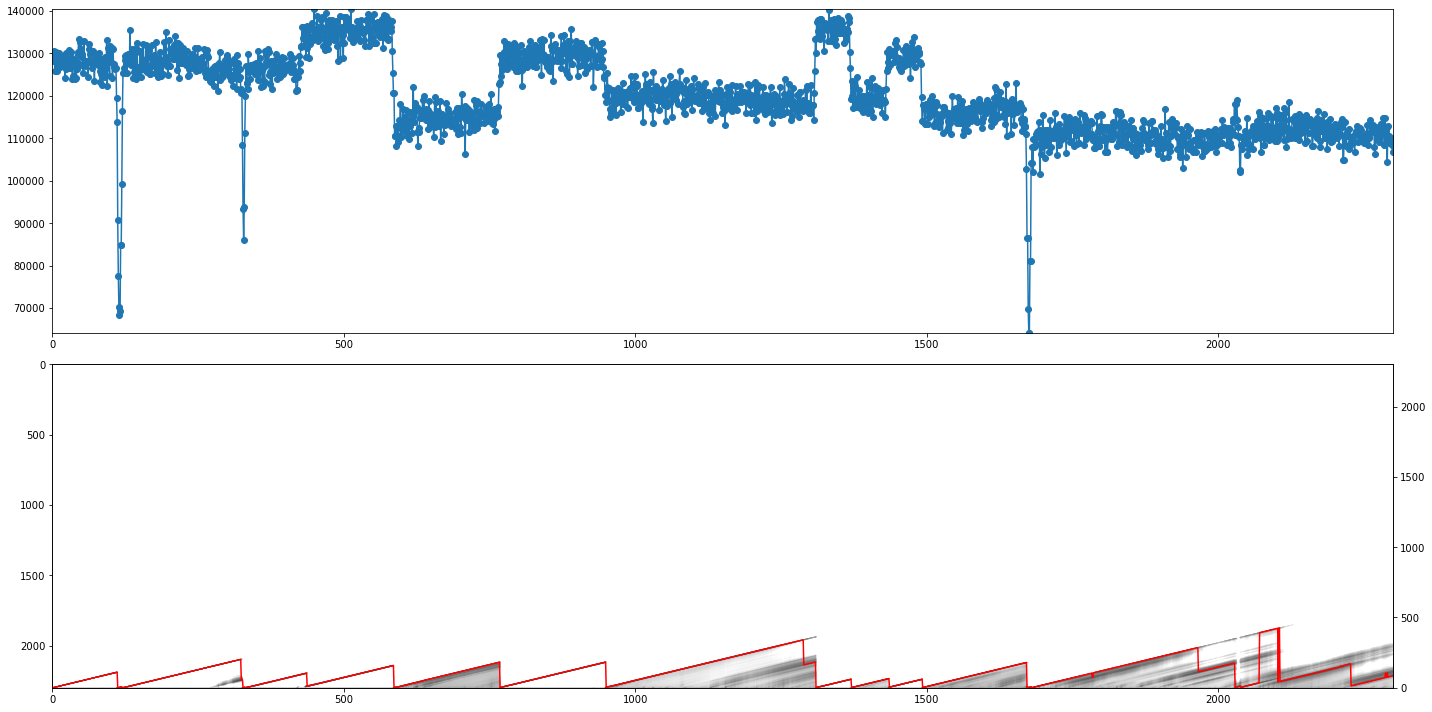

In [38]:
plot_posterior(T, data, R)

### Forward

In [39]:
beta = betaEstimator.beta(0, b=False)[0]
print(beta)
model = DSMGaussianUnknownMean(data,m ,grad_m, grad_t, hess_t, grad_b, beta, mean0, var0, varx)

703.6199154121283


In [40]:
%%time
R  = bocpd(data, hazard, model)

CPU times: user 4.39 s, sys: 166 ms, total: 4.56 s
Wall time: 4.64 s


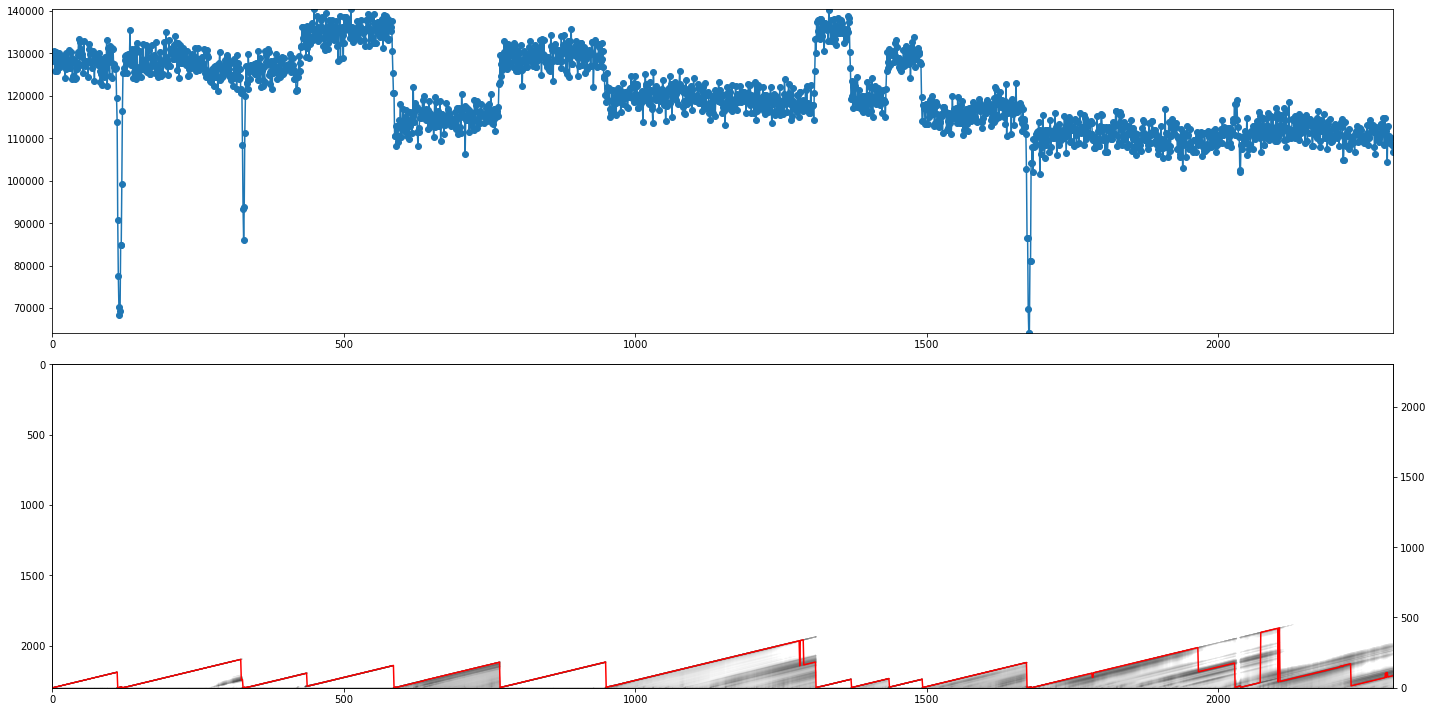

In [41]:
plot_posterior(T, data, R)

## Beta Estimator Fisher

In [42]:
betaEstimator = BetaEstimatorFisher(data[50:150], m, grad_m, grad_t, hess_t, grad_b, mean0, var0, B = 1000, d=1, p=1)

In [43]:
beta, thetasb = betaEstimator.beta()
print(beta)

1561.6623814068566


In [44]:
model = DSMGaussianUnknownMean(data,m ,grad_m, grad_t, hess_t, grad_b, beta, mean0, var0, varx)

In [45]:
%%time
R  = bocpd(data, hazard, model)

CPU times: user 3.35 s, sys: 150 ms, total: 3.5 s
Wall time: 3.51 s
